<a href="https://colab.research.google.com/github/karishma-upadhyay/IIITH_Projects_and_Apps/blob/main/Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Internship Batch of 2024**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

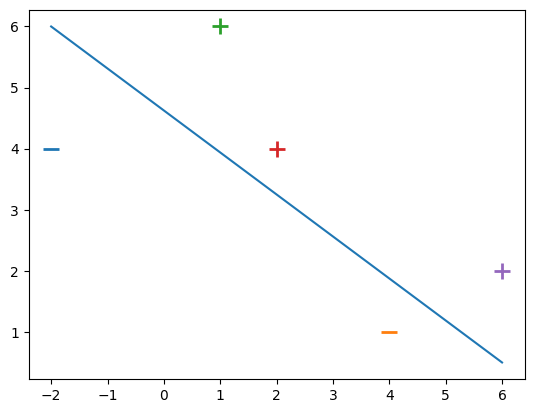

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

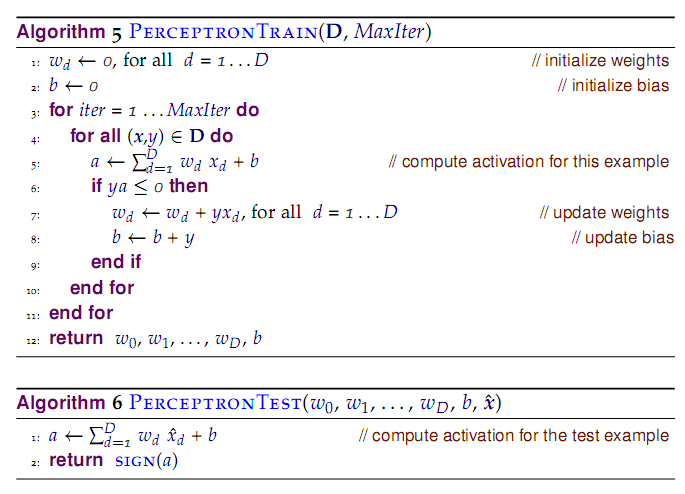

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

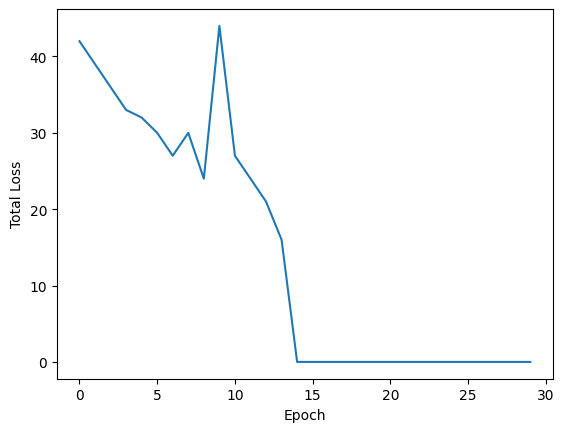

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

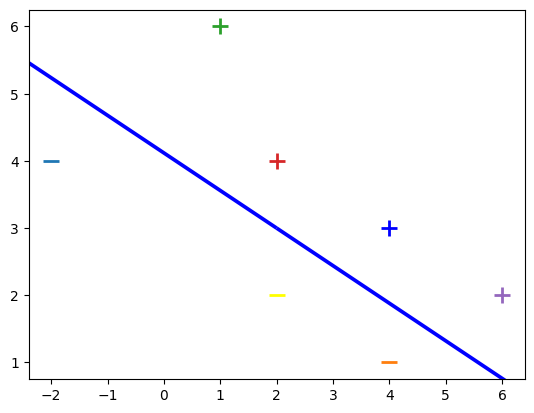

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.

2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.




1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3928 - loss: 0.8073 - val_accuracy: 0.6691 - val_loss: 0.6277
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7195 - loss: 0.5990 - val_accuracy: 0.8000 - val_loss: 0.5058
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8503 - loss: 0.4527 - val_accuracy: 0.8400 - val_loss: 0.3891
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8923 - loss: 0.3387 - val_accuracy: 0.9164 - val_loss: 0.2807
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9561 - loss: 0.2273 - val_accuracy: 0.9527 - val_loss: 0.1955
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9592 - loss: 0.1605 - val_accuracy: 0.9745 - val_loss: 0.1396
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9614 - loss: 0.1205 - val_accuracy: 0.9745 - val_loss: 0.1045
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9846 - loss: 0.0811 - val_accuracy: 0.9818 - val_loss: 0.0809
Epo

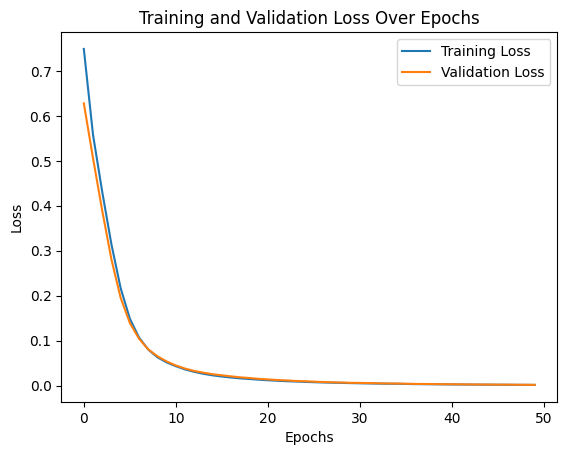

In [16]:

# Load the Banknote Authentication Dataset
# URL: https://archive.ics.uci.edu/ml/datasets/banknote+authentication
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
column_names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
data = pd.read_csv(url, header=None, names=column_names)

# Split the data into features and labels
X = data.drop('class', axis=1).values
y = data['class'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Neural Network model
model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.show()


2) Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


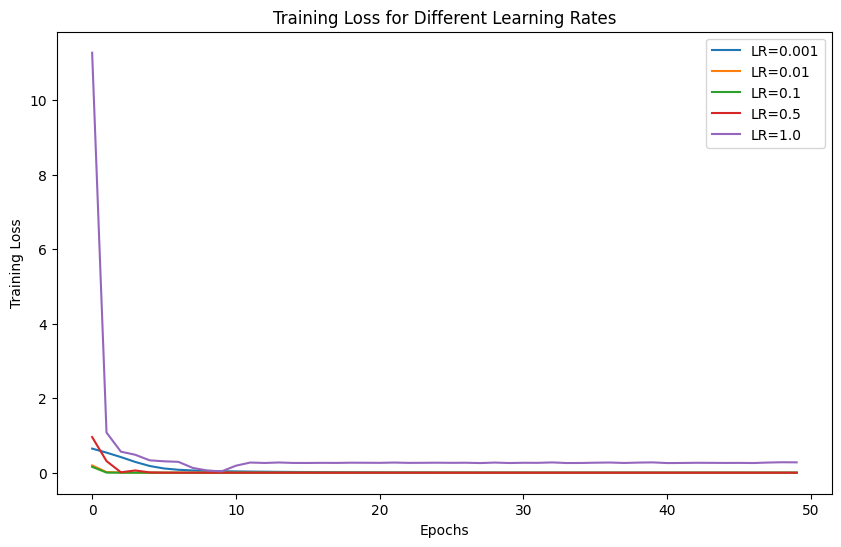

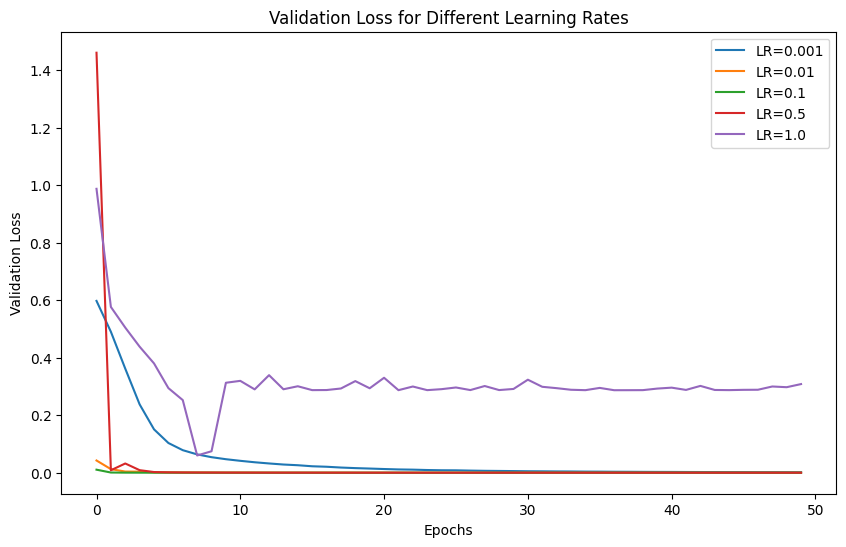

In [17]:

# Load the Banknote Authentication Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
column_names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
data = pd.read_csv(url, header=None, names=column_names)

# Split the data into features and labels
X = data.drop('class', axis=1).values
y = data['class'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to create, compile, and train the model with a specified learning rate
def train_model(learning_rate):
    # Define the Neural Network model
    model = Sequential([
        Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model with the given learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model and store the history
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32, verbose=0)

    # Return the training history
    return history

# Experiment with different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
histories = {}

# Train models with each learning rate and store their histories
for lr in learning_rates:
    histories[lr] = train_model(lr)

# Plot the training loss for different learning rates
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(histories[lr].history['loss'], label=f'LR={lr}')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.title('Training Loss for Different Learning Rates')
plt.show()

# Plot the validation loss for different learning rates
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(histories[lr].history['val_loss'], label=f'LR={lr}')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('Validation Loss for Different Learning Rates')
plt.show()


3) Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.

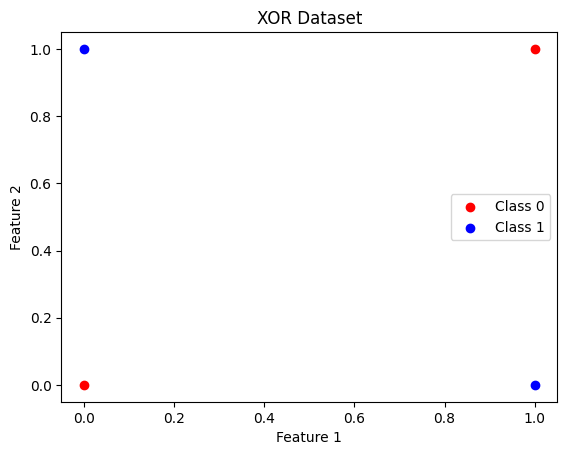

Perceptron Weights: [[0. 0.]]
Perceptron Bias: [0.]
Predictions: [0 0 0 0]
Accuracy: 0.5


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Generate XOR dataset (non-linearly separable)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR output

# Plot the XOR dataset
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('XOR Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Train the Perceptron algorithm
perceptron = Perceptron(max_iter=1000, tol=1e-3)
perceptron.fit(X, y)

# Predict on the same dataset
y_pred = perceptron.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Print the weights, predictions, and accuracy
print("Perceptron Weights:", perceptron.coef_)
print("Perceptron Bias:", perceptron.intercept_)
print("Predictions:", y_pred)
print("Accuracy:", accuracy)


In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


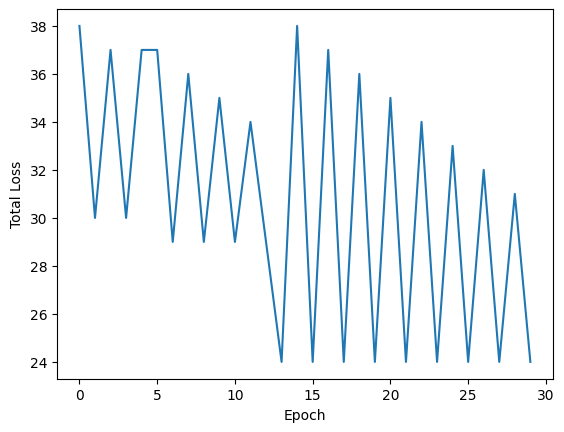

In [12]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.

  **Ans:**

  The perceptron can learn the AND function because it is linearly separable, and the weights can be adjusted appropriately after several iterations. The weights update procedure depends on the prediction errors, and once convergence is achieved, the perceptron will be able to classify the points correctly for the linearly separable AND dataset.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

  **Ans:**


Learnable by Perceptron: 14 out of 16 functions are linearly separable, including constant functions, single feature functions, AND/OR/NAND/NOR.
Not Learnable by Perceptron: 2 functions (XOR and XNOR) are not linearly separable.
Thus, out of 16 possible boolean functions over a 2-bit binary input, 14 can be learned by a perceptron, and the 2 non-learnable functions are XOR and XNOR.


The two boolean functions that are not learnable by a perceptron are XOR and XNOR. These functions are not linearly separable, meaning no single straight line can separate the positive and negative classes.

Here are the truth tables for both XOR and XNOR:

XOR Truth Table
The XOR function outputs 1 if exactly one of the inputs is 1, and 0 otherwise.


x1 x2	XOR


0	 0	0

0	 1	1

1	 0	1

1	 1	0

XNOR Truth Table
The XNOR function (negation of XOR) outputs 1 if both inputs are the same, and 0 otherwise.


x1 x2	XNOR

0	0	1


0	1	0

1	0	0

1	1	1
